<a href="https://colab.research.google.com/github/SampathPatil0/DSML_Projects/blob/main/Netfix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorotaory Data Analysis of Netflix**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 39.1MB/s]


In [ ]:
data= pd.read_csv("netflix.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data2= data.copy()

In [ ]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data2["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data2["country"].unique()

In [ ]:
data2["director"].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data2["director"].to_list()

In [ ]:
data2["listed_in"].to_list()

In [ ]:
data2["cast"].to_list()

In [ ]:
data2= data2.assign(cast= data2["cast"].str.split(",")).explode("cast")

In [ ]:
data2= data2.assign(listed_in= data2["listed_in"].str.split(",")).explode("listed_in")

In [ ]:
data2= data2.assign(director=data2["director"].str.split(",")).explode("director")

In [ ]:
data2= data2.assign(country= data2["country"].str.split(",")).explode("country")

In [ ]:
data2["date_added"]= pd.to_datetime(data2["date_added"])

In [ ]:
data2.drop("description",axis=1, inplace=True)

In [ ]:
#Finding Null values

data2.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

In [ ]:
data2.shape

(202065, 11)

In [ ]:
## Finding MODE for ratings

data2.groupby(["type","director","country"])[["rating"]].agg(pd.Series.mode)

rating
type    director                  country              
Movie    Aaron Moorhead           United States   TV-MA
         Aaron Woolf               Venezuela      TV-14
                                  United States   TV-14
         Abbas Alibhai Burmawalla India           TV-14
         Abdullah Al Noor         Bangladesh      TV-MA
...                                                 ...
TV Show Vikramaditya Motwane       United States  TV-MA
                                  India           TV-MA
        Wouter Bouvijn            Belgium         TV-MA
        Yasuhiro Irie             Japan           TV-14
        Ziad Doueiri              France          TV-MA

[6967 rows x 1 columns]

In [ ]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [ ]:
data2.dropna(subset=["rating"], inplace=True)

In [ ]:
data2["rating"].isna().sum()

0

In [ ]:
data2.dropna(subset=["date_added","duration"], inplace=True)

In [ ]:
data2.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


# 1. Defining Problem Statement and Analysing basic metrics

### Netflix is one of the most popular media and video streaming platform. Based on the historic data we have to analyze, do all the required data cleaning and data preparation and provide insights which must help Netflix to to produce good content and help them to grow business.

### 1.a. Find number of movies and number of shows

In [ ]:
data2["type"].value_counts()

Movie      145905
TV Show     55932
Name: type, dtype: int64

### 1.b. Find the value counts of Genres

In [ ]:
data2["listed_in"].value_counts()

 International Movies    27141
Dramas                   19650
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

## 1.c. Find number of movies and number of shows in the given  Country wise

### 1.c.1 Number of movies in country wise

In [ ]:
data2_movies= data2[data2['type']=="Movie"]

In [ ]:
data2_movies.groupby("country")[["show_id"]].count()

,show_id
country,
,98
Afghanistan,2
Albania,8
Algeria,77
Angola,32
...,...
Uruguay,122
Venezuela,4
Vietnam,134


### 1c.2 Number of TV Shows in country wise

In [ ]:
data2_tvshows= data2[data2['type']=="TV Show"]

In [ ]:
data2_tvshows.groupby("country")[["show_id"]].count()

,show_id
country,
,8
Australia,143
Azerbaijan,33
Belgium,79
Brazil,48
...,...
United Arab Emirates,39
United Kingdom,4051
United States,11468


### 1d.1 Find number of movies released in year wise

In [ ]:
data2_movies.groupby("release_year")[["show_id"]].count()

,show_id
release_year,
1942,6
1943,5
1944,24
1945,12
1946,2
...,...
2017,15066
2018,17060
2019,11926


### 1d.2  Find number of TV  released in year wise

In [ ]:
data2_tvshows.groupby("release_year")[["show_id"]].count()

### 1d.3  Find number of TV shows and movies  released in year wise

In [ ]:
data2.groupby(["release_year","type"])[["show_id"]].count()

show_id
release_year type            
1925         TV Show        1
1942         Movie          6
1943         Movie          5
1944         Movie         24
1945         Movie         12
...                       ...
2019         TV Show    10005
2020         Movie       9608
             TV Show    10089
2021         Movie       5427
             TV Show     6467

[119 rows x 1 columns]

### 1.e. Find the Individual Rating by overall Ratings (avoiding null values)

In [ ]:
data2['rating'].value_counts(normalize=True)

TV-MA       0.366053
TV-14       0.217428
R           0.128123
PG-13       0.080491
TV-PG       0.073886
PG          0.054098
TV-Y7       0.031184
TV-Y        0.018153
TV-G        0.013769
NR          0.007645
G           0.007580
NC-17       0.000738
TV-Y7-FV    0.000426
UR          0.000426
Name: rating, dtype: float64

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

### 2.a  conversion of categorical attributes to 'category' (If required)

In [ ]:
data2["show_id"]= data2["show_id"].astype("str")
data2["type"]= data2["type"].astype("str")
data2["director"]= data2["director"].astype("str")
data2["cast"]= data2["cast"].astype("str")
data2["release_year"]= data2["release_year"].astype("int")
data2["rating"]= data2["rating"].astype("str")
data2["date_added"]= pd.to_datetime(data2["date_added"])
data2["listed_in"]= data2["listed_in"].astype("str")

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201837 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201837 non-null  object        
 1   type          201837 non-null  object        
 2   title         201837 non-null  object        
 3   director      201837 non-null  object        
 4   cast          201837 non-null  object        
 5   country       201837 non-null  object        
 6   date_added    201837 non-null  datetime64[ns]
 7   release_year  201837 non-null  int64         
 8   rating        201837 non-null  object        
 9   duration      201837 non-null  object        
 10  listed_in     201837 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


### 2.b   statistical summary

In [ ]:
data2.describe(include=object).T

,count,unique,top,freq
show_id,201837,8790,s7165,700
type,201837,2,Movie,145905
title,201837,8790,Kahlil Gibran's The Prophet,700
director,201837,5119,Unknown Director,50425
cast,201837,39249,Unknown Cast,2149
country,201837,198,United States,49781
rating,201837,14,TV-MA,73883
duration,201837,220,1 Season,34977
listed_in,201837,73,International Movies,27141


# 3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data2["show_id"].value_counts()

s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s2680      1
s2687      1
s2690      1
s6816      1
s1         1
Name: show_id, Length: 8790, dtype: int64

In [ ]:
data2["show_id"].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [ ]:
data2["type"].value_counts()

Movie      145905
TV Show     55932
Name: type, dtype: int64

In [ ]:
data2["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data2["title"].value_counts()

Kahlil Gibran's The Prophet             700
Holidays                                504
Movie 43                                468
The Eddy                                416
Narcos                                  378
                                       ... 
Maurício Meirelles: Generating Chaos      1
Chris D'Elia: No Pain                     1
Surviving R. Kelly: The Impact            1
Functional Fitness                        1
Dick Johnson Is Dead                      1
Name: title, Length: 8790, dtype: int64

In [ ]:
data2["title"].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [ ]:
data2["director"].value_counts()

Unknown Director       50425
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Leslye Davis               1
 Freddie Waters            1
Dave Skinner               1
Alex Gibney                1
Kirsten Johnson            1
Name: director, Length: 5119, dtype: int64

In [ ]:
data2["director"].unique()

array(['Kirsten Johnson', 'Unknown Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data2["country"].value_counts()

United States      49781
India              22139
Unknown Country    11894
United Kingdom      9706
 United States      9482
                   ...  
 Samoa                 2
 Sri Lanka             2
 Kazakhstan            1
 Uganda                1
 Nicaragua             1
Name: country, Length: 198, dtype: int64

In [ ]:
data2["country"].unique()

In [ ]:
data2["release_year"].value_counts()

2018    24440
2019    21931
2017    20513
2020    19697
2016    18460
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
data2["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
data2["rating"].value_counts()

TV-MA       73883
TV-14       43885
R           25860
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [ ]:
data2["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data2["duration"].value_counts()

1 Season     34977
2 Seasons     9485
3 Seasons     5060
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
data2["duration"].unique()

In [ ]:
data2["listed_in"].value_counts()

 International Movies    27141
Dramas                   19650
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

In [ ]:
data2["listed_in"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [ ]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [ ]:
def calc(x):
  y= x.split()[0]
  return y

In [ ]:
data2.insert(10,"Timings", data2["duration"].apply(calc))

In [ ]:
def calc(x):
  y= x.split()[1]
  return y

In [ ]:
data2.insert(11,"Readings", data2["duration"].apply(calc))

In [ ]:
data2["netflix_release_year"]= data2["date_added"].dt.year
data2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,netflix_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Dramas,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Mysteries,2021
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,111,min,International Movies,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,111,min,Music & Musicals,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,111,min,Dramas,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,111,min,International Movies,2019


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


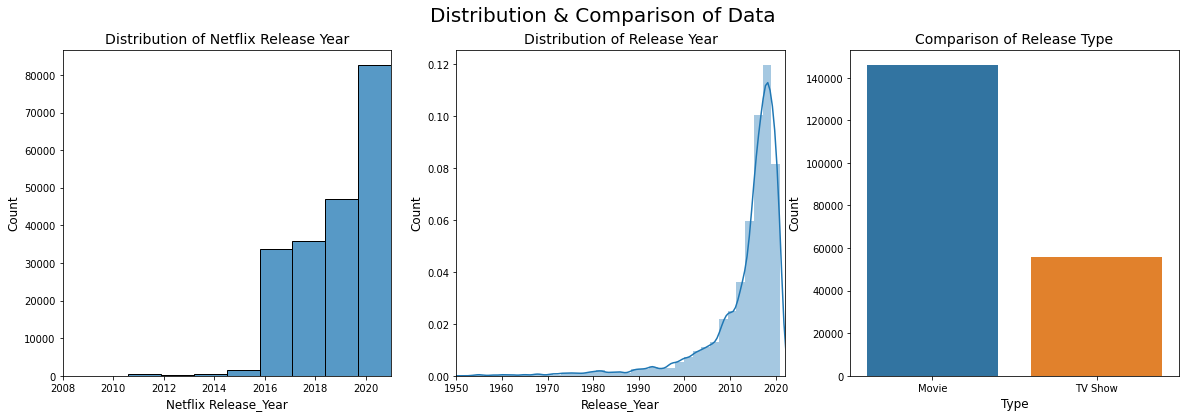

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.histplot(data2["netflix_release_year"],bins=10)
plt.xlim(2008,2021)
plt.xlabel("Netflix Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Distribution of Netflix Release Year",fontsize=14)

plt.subplot(1, 3, 3)
sns.countplot(data=data2,x="type")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Comparison of Release Type",fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(data2["release_year"])
plt.xlim(1950,2022)
plt.xlabel("Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Distribution of Release Year",fontsize=14)



plt.suptitle("Distribution & Comparison of Data",fontsize=20)
plt.show()

In [ ]:
data2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,netflix_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021


In [ ]:
data2["Timings"]= data2["Timings"].astype("int")

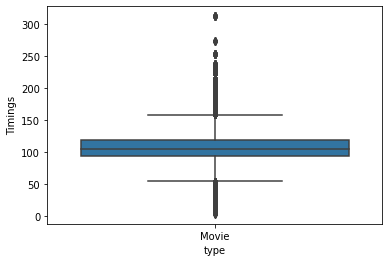

In [ ]:
sns.boxplot(data=data2[data2["type"]=="Movie"],x="type",y="Timings")

### 4.2 For categorical variable(s)

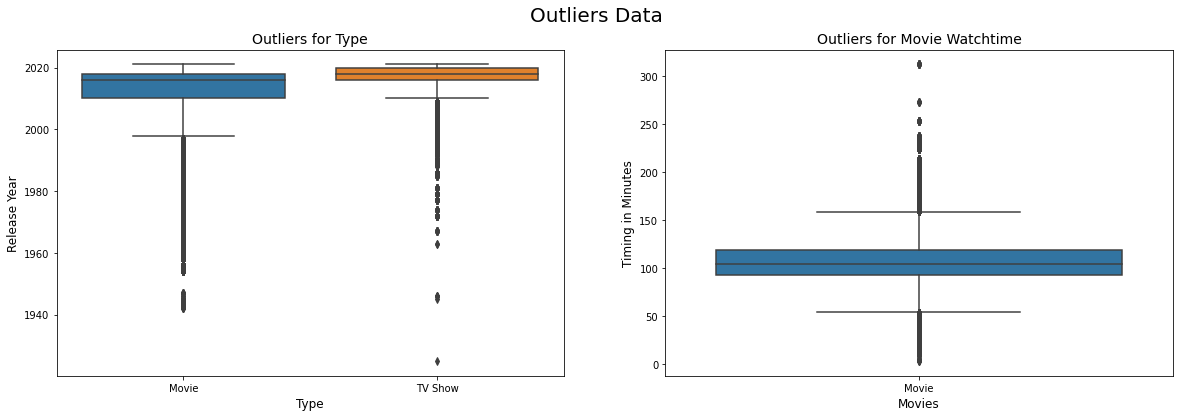

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)

sns.boxplot(data=data2, x="type",y="release_year")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Release Year",fontsize=12)
plt.title("Outliers for Type",fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=data2[data2["type"]=="Movie"],x="type",y="Timings")
plt.xlabel("Movies",fontsize=12)
plt.ylabel("Timing in Minutes",fontsize=12)
plt.title("Outliers for Movie Watchtime",fontsize=14)

plt.suptitle("Outliers Data",fontsize=20)
plt.show()

# 5. Missing Value & Outlier check (Treatment optional)

## Removing the Nan values of Director, cast, coutry with Unknown

In [ ]:
data2["director"].fillna("Unknown Director", inplace=True)

In [ ]:
data2["cast"].fillna("Unknown Cast", inplace=True)

In [ ]:
data2["country"].fillna("Unknown Country", inplace=True)

In [ ]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,netflix_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Dramas,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Mysteries,2021
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021


## Outliers in Rating

Text(0.5, 1.0, 'Outliers for Rating')

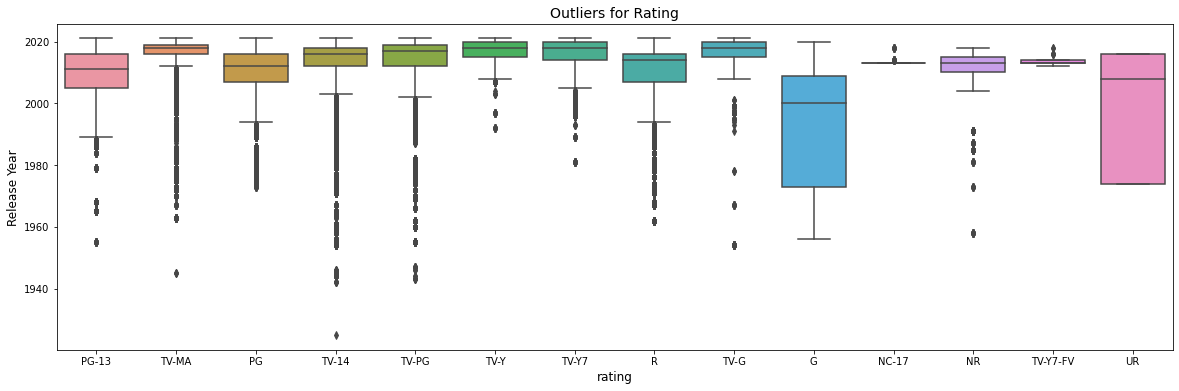

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=data2, x="rating",y="release_year")
plt.xlabel("rating",fontsize=12)
plt.ylabel("Release Year",fontsize=12)
plt.title("Outliers for Rating",fontsize=14)

## Outliers in Readings

Text(0.5, 1.0, 'Outliers for Rating')

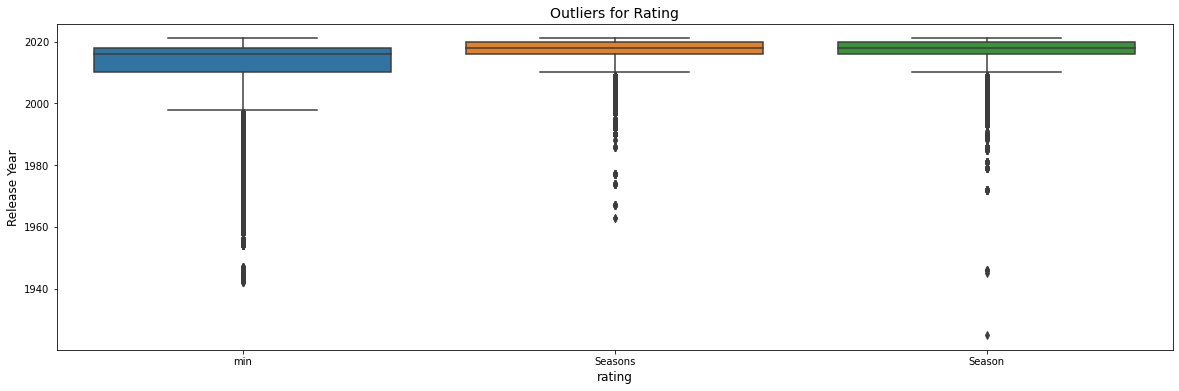

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=data2, x="Readings",y="release_year")
plt.xlabel("rating",fontsize=12)
plt.ylabel("Release Year",fontsize=12)
plt.title("Outliers for Rating",fontsize=14)

# 6. Insights based on Non-Graphical and Visual Analysis

### 6.1 Comments on the range of attributes

columns, dtypes, size, shape, ndim, values, T are determined as range of attributes and below are the details of each.

In [ ]:
data2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Timings', 'Readings',
       'listed_in', 'netflix_release_year'],
      dtype='object')

In [ ]:
data2.dtypes

show_id                         object
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added              datetime64[ns]
release_year                     int64
rating                          object
duration                        object
Timings                          int64
Readings                        object
listed_in                       object
netflix_release_year             int64
dtype: object

In [ ]:
data2.size

2825718

In [ ]:
data2.shape

(201837, 14)

In [ ]:
data2.ndim

2

In [ ]:
data2.values

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., 'min',
        'Documentaries', 2021],
       ['s2', 'TV Show', 'Blood & Water', ..., 'Seasons',
        'International TV Shows', 2021],
       ['s2', 'TV Show', 'Blood & Water', ..., 'Seasons', ' TV Dramas',
        2021],
       ...,
       ['s8807', 'Movie', 'Zubaan', ..., 'min', 'Dramas', 2019],
       ['s8807', 'Movie', 'Zubaan', ..., 'min', ' International Movies',
        2019],
       ['s8807', 'Movie', 'Zubaan', ..., 'min', ' Music & Musicals',
        2019]], dtype=object)

In [ ]:
data2.T

### 6.2 Comments on the distribution of the variables and relationship between them


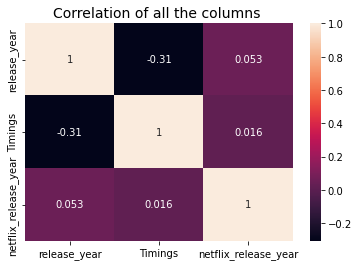

In [ ]:
sns.heatmap(data2.corr(),annot=True)
plt.title("Correlation of all the columns ",fontsize=14)
plt.show()

### 6.3 Comments for each univariate and bivariate plot

# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

## Top 10 Directors

Text(0.5, 1.0, 'Top 10 Directors')

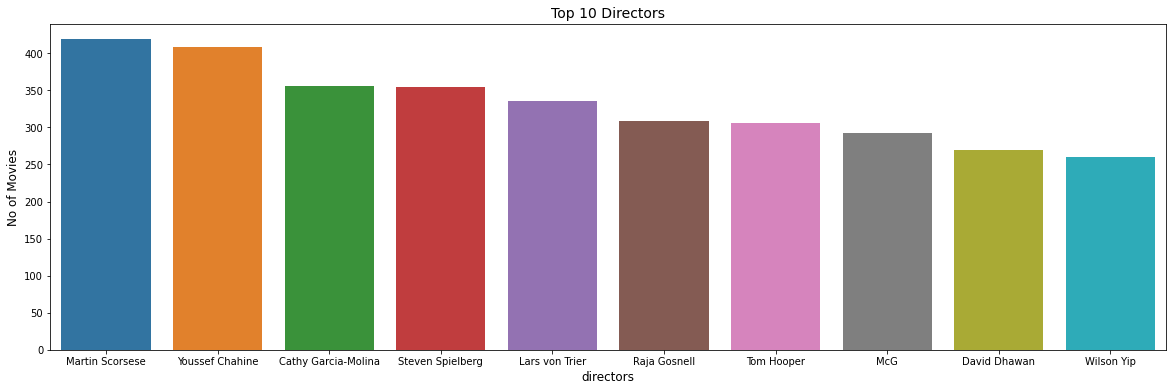

In [ ]:
topdirectors = data2['director'].value_counts().sort_values(ascending=False)[1:11]
plt.figure(figsize=(20,6))
sns.barplot(x=topdirectors.index,y=topdirectors.values)
plt.xlabel("directors",fontsize=12)
plt.ylabel("No of Movies",fontsize=12)
plt.title("Top 10 Directors",fontsize=14)

## Top 10 Countries with Netflix content

Text(0.5, 1.0, 'Top Countries with content')

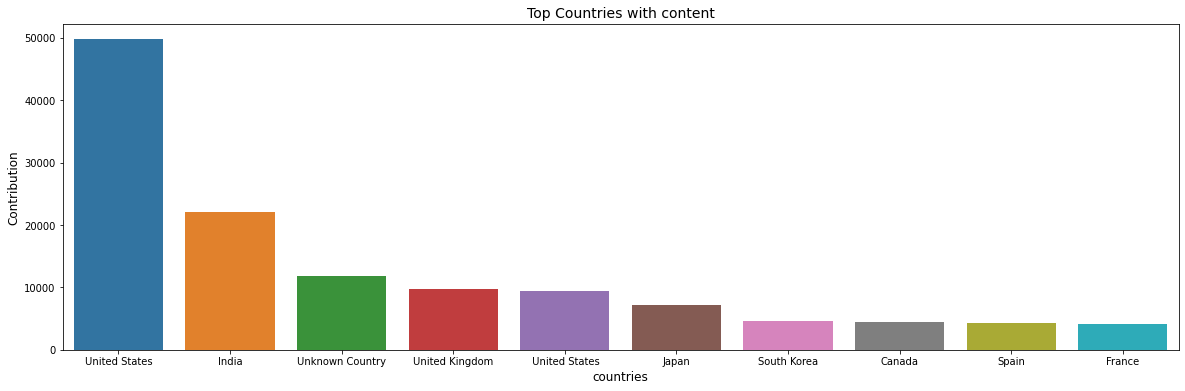

In [ ]:
topcountries = data2['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,6))
sns.barplot(x=topcountries.index,y=topcountries.values)
plt.xlabel("countries",fontsize=12)
plt.ylabel("Contribution",fontsize=12)
plt.title("Top Countries with content",fontsize=14)

## Distribution of Ratings: TV-MA rating contributes the most

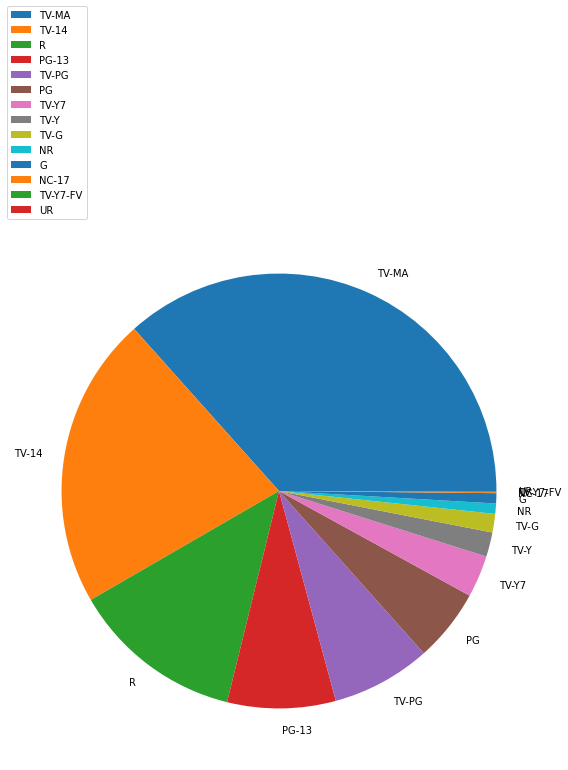

In [ ]:
plt.figure(figsize=(25,10))
plt.pie(data2.rating.value_counts(),labels=data2.rating.value_counts().index)
plt.legend(loc=(0,1))
plt.show()

## Top 10 Release Year

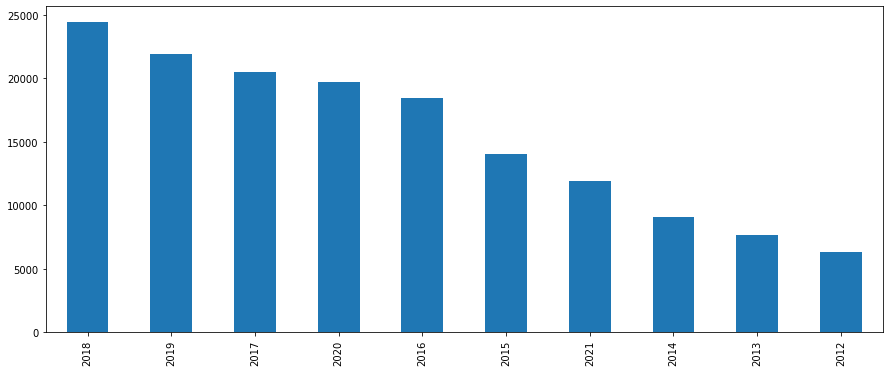

In [ ]:
plt.figure(figsize=(15,6))
data2.release_year.value_counts(ascending=False).head(10).plot(kind='bar')